In [7]:
import numpy as np
import cv2
import time
from pynq import Overlay
import pynq.lib.dma
from PIL import Image
from pynq import Xlnk
import random
import matplotlib.pyplot as plt
import time

OVERLAY = 'sobel.bit'

In [8]:
frame_in = Image.open('lena.jpg')
img_in = np.array(frame_in)

In [9]:
ol = Overlay(OVERLAY)
ol?
dma = ol.axi_dma_0
canny_edge=ol.canny_edge_0
#xlnk = Xlnk()
#in_buffer = xlnk.cma_array(shape=(512,512), dtype=np.uint8)
#out_buffer = xlnk.cma_array(shape=(512,512), dtype=np.uint8)
#CREATE CONTIGOUS MEMORY ALLOCATED BUFFERS THROUGH XLNK

In [10]:
xlnk = Xlnk()
image_buffer  = xlnk.cma_array(shape=(512,512), dtype=np.uint8)
out_buffer = xlnk.cma_array(shape=(512,512), dtype=np.uint8)

np.copyto(image_buffer,img_in)

In [15]:
t = time.time()
canny_edge.write(0x14, 512)
canny_edge.write(0x1c, 512)
canny_edge.write(0x24, 20)
canny_edge.write(0x2c, 200)

def run_kernel():
    dma.sendchannel.transfer(image_buffer)
    dma.recvchannel.transfer(out_buffer)    
    canny_edge.write(0x00,0x81) # start
    dma.sendchannel.wait()
    dma.recvchannel.wait()

run_kernel()

print(time.time() - t)
#result = Image.fromarray(out_buffer)
#display(result)
#print("Resized in Hardware(PL): {}x{} pixels.".format(new_width, new_height))

0.005130767822265625


ContiguousArray([[0, 0, 0, ..., 0, 0, 0],
                 [0, 0, 0, ..., 0, 0, 0],
                 [0, 0, 0, ..., 0, 0, 0],
                 ..., 
                 [0, 0, 0, ..., 0, 0, 0],
                 [0, 0, 0, ..., 0, 0, 0],
                 [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

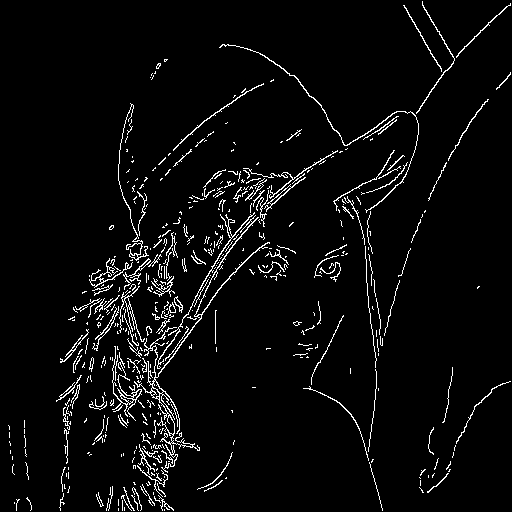

In [16]:
display(out_buffer)
img_cv2pynq_1 = Image.fromarray(out_buffer.astype('uint8'))
img_cv2pynq_1
#cv2.imwrite('output,jpg',out_buffer)